In [1]:
import sklearn
from sklearn.svm import SVC
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

Using matplotlib backend: Qt5Agg


In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [ ]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Question1

In [ ]:
# 1(a)

with open(r'M:\Documents\Courses\Credits\2019August\Computational Data Analysis\Module8\Exercises 8\Data\Synthetic2DNoOverlapp.csv', newline='') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    
X = data[:,0:2].astype(np.float)
y = data[:,-1].ravel()

kernelType = 'linear'
degreeVal = 5 
cVal = 2000

model = SVC(kernel='linear', degree=degreeVal)

print(model.coef_)

title = 'SVC with %s kernel' % kernelType
        
# Set-up 2x2 grid for plotting.

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.subplot(111)
plot_contours(ax, model.fit(X,y), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y.T.tolist()[0], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()


In [ ]:
# 1(b)

with open(r'M:\Documents\Courses\Credits\2019August\Computational Data Analysis\Module8\Exercises 8\Data\Synthetic2DOverlap.csv', newline='') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    
X = data[:,0:2].astype(np.float)
y = data[:,2].ravel()

kernelType = 'linear'

model = SVC(kernel='linear')

title = 'SVC with %s kernel' % kernelType
        
# Set-up 2x2 grid for plotting.

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.subplot(111)
plot_contours(ax, model.fit(X,y), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

# Question 3

In [ ]:
with open(r'M:\Documents\Courses\Credits\2019August\Computational Data Analysis\Module8\Exercises 8\Data\Ex3Data.csv', newline='') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    
X = data[:,0:2].astype(np.float)
y = data[:,2].ravel()

kernelType = 'rbf'
degreeVal = 5 
gammaVal = 0.5
cVal = 1

model = SVC(kernel=kernelType, degree=degreeVal, C=cVal, gamma=gammaVal)

title = 'SVC with %s kernel and %s lambda and %s sigma' % (kernelType, cVal, gammaVal)
        
# Set-up 2x2 grid for plotting.

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plt.figure()
ax = plt.subplot(111)
plot_contours(ax, model.fit(X,y), xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

# Question5

In [2]:
dataFrame = pd.read_csv(r'M:\Documents\Courses\Credits\2019August\Computational Data Analysis\Module8\Exercises 8\Data\ACS.csv')

dataTrain = np.asarray(dataFrame)[dataFrame['Train'] == 1,:]
dataTest = np.asarray(dataFrame)[dataFrame['Train'] == 0,:]
   
X_train = dataTrain[:,:-1]
y_train = dataTrain[:,-2:-1].ravel() # Second to last row in dataframe is class

X_test = dataTest[:,:-1]
y_test = dataTest[:,-2:-1].ravel() # Second to last row in dataframe is class


fold 0
kernel linear
0.87 0.8579080913447984
kernel sigmoid
0.875 0.8463490273470539
kernel rbf
0.925 0.9168311248942769
fold 1
kernel linear
0.88 0.8601635184663096
kernel sigmoid
0.885 0.8508598815900761
kernel rbf
0.94 0.9168311248942769
fold 2
kernel linear
0.84 0.8384550324217649
kernel sigmoid
0.84 0.8438116718353538
kernel rbf
0.905 0.9168311248942769
fold 3
kernel linear
0.8 0.8567803777840428
kernel sigmoid
0.845 0.8556526642232873
kernel rbf
0.895 0.9168311248942769
fold 4
kernel linear
0.77 0.8393008175923315
kernel sigmoid
0.835 0.8483225260783761
kernel rbf
0.9 0.9168311248942769


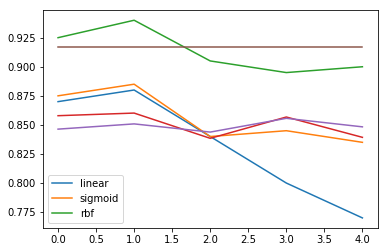

In [3]:


kernelTypes = ['linear', 'sigmoid', 'rbf']
degreeVal = 5 
gamma = 0.5
cVal = 1

#modelTrain = SVC(kernel=kernelType, degree=degreeVal, C=cVal)
#yHat_svm = modelTrain.fit(X_train, y_train).predict(X_test)
#mse_svm = 1-sum(y_test==yHat_svm)/len(y_test)

modelLog = sklearn.linear_model.LogisticRegression()
yHat_log = modelLog.fit(X_train, y_train).predict(X_test)
mse_log = 1-sum(y_test==yHat_log)/len(y_test)

K = 5
kf = KFold(n_splits=K)

accTrain = np.zeros((K,len(kernelTypes)))
accTest = np.zeros((K,len(kernelTypes)))

# training data is aplit into training and testing - for validation
for ind, (train_index, test_index) in enumerate(kf.split(X_train)):
    print('fold', ind)
    for ind_kernal, kernalType in enumerate(kernelTypes):
        print('kernel', kernalType)
        model_svm = SVC(kernel=kernalType, degree=degreeVal, C=cVal, gamma=gamma, shrinking = False)
        model_svm = model_svm.fit(X_train[train_index,:], y_train[train_index]) 
        yHat_svm_train = model_svm.predict(X_train[test_index])
        yHat_svm_test = model_svm.predict(X_test)
        
        accTrain[ind, ind_kernal] = sum(y_train[test_index]==yHat_svm_train)/len(y_train[test_index])
        accTest[ind, ind_kernal] = sum(y_test==yHat_svm_test)/len(y_test)
        
        print(accTrain[ind, ind_kernal], accTest[ind, ind_kernal])

        
plt.plot(accTrain)
plt.plot(accTest)
plt.legend(kernelTypes)

In [ ]:
accTrain